<a href="https://colab.research.google.com/github/thesakib2020/ThinkStats2/blob/master/2020_09_Visualize_It.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize It!
## Mental Health Data in the Time of COVID-19

<img src="https://github.com/hoffm386/visualize-it-2020-09/raw/master/index_files/index_21_0.png" width=200 style="float: left"/>
<img src="https://github.com/hoffm386/visualize-it-2020-09/raw/master/index_files/index_24_0.png" width=200 style="float: left"/>
<img src="https://github.com/hoffm386/visualize-it-2020-09/raw/master/index_files/index_43_0.png" width=200 style="float: left"/>
<img src="https://github.com/hoffm386/visualize-it-2020-09/raw/master/index_files/index_46_0.png" width=200 style="float: left"/>


Erin Hoffman — Data Science Coach at [Flatiron School](https://flatironschool.com/)

September 29th, 2020

(You can find me on [LinkedIn](https://www.linkedin.com/in/erinrachaelhoffman/), [GitHub](https://github.com/hoffm386), and [Medium](https://medium.com/@erin_r_hoffman))

This notebook walks through a [dataset from the CDC](https://www.cdc.gov/nchs/covid19/pulse/mental-health-care.htm) that was collected as part of an experimental new 2020 survey called the Household Pulse Survey.  It has fewer than 100 downloads so far according to the CDC website!

Data from this dataset represents the past month in the United States, which means August 19th - 31st and September 2nd - 14th for this workshop

We are going to use Python libraries to create visualizations to understand this data

## About the Data

### Survey Questions

##### _At any time in the last 4 weeks, did you take prescription medication to help you with any emotions or with your concentration, behavior or mental health?_

##### _At any time in the last 4 weeks, did you receive counseling or therapy from a mental health professional such as a psychiatrist, psychologist, psychiatric nurse, or clinical social worker? Include counseling or therapy online or by phone._

##### _At any time in the last 4 weeks, did you need counseling or therapy from a mental health professional, but did not get it for any reason?_

### Data Source

#### Sample size: 92,956 respondents
(for September 2nd - 14th data)

### Collecting the Data from the CDC Website

In [ ]:
# Un-comment these lines of code if you get an error message importing geopandas
# ! pip install geopandas
# ! pip install descartes

In [ ]:
# Library imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas

In [ ]:
# Colors and styling

# DataFrame fonts
# Credit: https://stackoverflow.com/a/58801427/11482491
heading_properties = [('font-size', '16px')]
cell_properties = [('font-size', '16px')]
df_style = [dict(selector="th", props=heading_properties),\
 dict(selector="td", props=cell_properties)]

# DataFrame percentage formatting
# Credit: https://stackoverflow.com/a/55624414/11482491
df_format = {
    "Accessed": "{:.1f}%",
    "Unable to Access": "{:.1f}%",
    "Didn't Need Therapy": "{:.1f}%"
}

# Graph styles
sns.set_style("whitegrid")
# plt.style.use('dark_background')
sns.set_context("talk")

# Graph colors
flatiron_blue = "#32cefe"
workzone_yellow = "#ffd43d"
slate_gray = "#2b2b2b"

In [ ]:
url = "https://data.cdc.gov/resource/yni7-er2q.json"
response = requests.get(url)

We are hoping for a 200 status code, meaning the request was successful

In [ ]:
response

<Response [200]>

In [ ]:
data_json = response.json()

In [ ]:
df = pd.DataFrame(data_json)

In [ ]:
df.head()

,indicator,group,state,subgroup,phase,time_period,time_period_label,value,lowci,highci,confidence_interval,quartile_range
0,Took Prescription Medication for Mental Health...,National Estimate,United States,United States,2,13,Aug 19 - Aug 31,19.4,19,19.8,19.0 - 19.8,NaN
1,Took Prescription Medication for Mental Health...,By Age,United States,18 - 29 years,2,13,Aug 19 - Aug 31,18.7,17.2,20.3,17.2 - 20.3,NaN
2,Took Prescription Medication for Mental Health...,By Age,United States,30 - 39 years,2,13,Aug 19 - Aug 31,18.3,17.3,19.2,17.3 - 19.2,NaN
3,Took Prescription Medication for Mental Health...,By Age,United States,40 - 49 years,2,13,Aug 19 - Aug 31,20.4,19.5,21.3,19.5 - 21.3,NaN
4,Took Prescription Medication for Mental Health...,By Age,United States,50 - 59 years,2,13,Aug 19 - Aug 31,21.2,20.2,22.2,20.2 - 22.2,NaN


In [ ]:
df["indicator"].value_counts()

Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks    144
Received Counseling or Therapy, Last 4 Weeks                                                          144
Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks                                         144
Took Prescription Medication for Mental Health, Last 4 Weeks                                          144
Name: indicator, dtype: int64

## Across the United States, Who Gets Therapy When They Need It?

This dataset contains features related to access to therapy.  We are going to look at, specifically:

1. Who received counseling or therapy?
2. Who needed counseling or therapy, but didn't get it?

Let's start with high-level numbers for the most recent estimate:

#### What percentage of people in the United States received counseling or therapy?

In [ ]:
# Extract the data point based on the query terms
us_got_therapy = df[
    (df["indicator"] == "Received Counseling or Therapy, Last 4 Weeks") &
    (df["subgroup"] == "United States") &
    (df["time_period"] == "14")
]["value"]

# Convert into a single number
us_got_therapy = float(us_got_therapy.item())

print(f"{us_got_therapy}% of people in the United States received counseling or therapy")

9.1% of people in the United States received counseling or therapy


#### What percentage of people in the United States needed counseling or therapy, but didn't get it?

In [ ]:
us_needed_therapy = df[
    (df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") &
    (df["subgroup"] == "United States") &
    (df["time_period"] == "14")
]["value"]

us_needed_therapy = float(us_needed_therapy.item())

print(f"{us_needed_therapy}% of people in the United States needed counseling or therapy, but didn't get it")

9.7% of people in the United States needed counseling or therapy, but didn't get it


#### What percentage of people are in neither category?

In [ ]:
us_didnt_need_therapy = 100 - us_got_therapy - us_needed_therapy

print(f"{us_didnt_need_therapy}% of people didn't receive or need therapy")

81.2% of people didn't receive or need therapy


#### Pulling all US data into a table

In [ ]:
us_df = pd.DataFrame([{
    "Accessed": us_got_therapy,
    "Unable to Access": us_needed_therapy,
    "Didn't Need Therapy": us_didnt_need_therapy
}], index=["United States Overall"])

us_df.style.set_table_styles(df_style).format(df_format)

,Accessed,Unable to Access,Didn't Need Therapy
United States Overall,9.1%,9.7%,81.2%


## Visualize It!

We could theoretically stop there, with those three numbers.  But we know that humans are better at distinguishing between lengths than numbers!  So let's make a visualization instead.

Here we have two dimensions:

1. Therapy access
2. Percentage

We can show this information with a simple **bar plot**

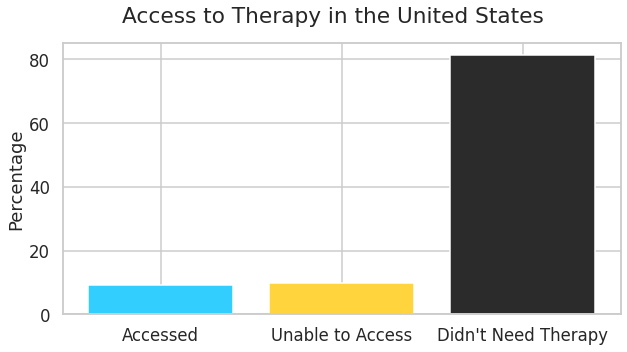

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(
    x=us_df.columns,
    height=us_df.loc["United States Overall"].values,
    color=[flatiron_blue, workzone_yellow, slate_gray]
)

ax.set_ylabel("Percentage")
fig.suptitle("Access to Therapy in the United States");

#### What if we leave out "didn't need therapy"?

In [ ]:
# drop "didn't need therapy" column
us_df.drop("Didn't Need Therapy", axis=1, inplace=True)

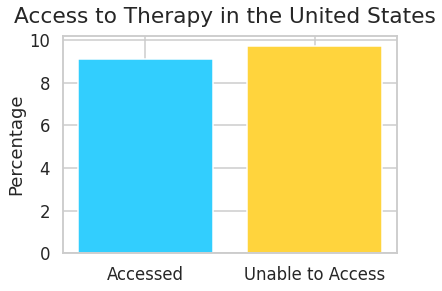

In [ ]:
fig, ax = plt.subplots()

ax.bar(
    x=us_df.columns,
    height=us_df.loc["United States Overall"].values,
    color=[flatiron_blue, workzone_yellow]
)

ax.set_ylabel("Percentage")
fig.suptitle("Access to Therapy in the United States");

#### _What is the difference in the stories told by these two visualizations?_

## Breakdown by Gender

Gender is encoded as a binary variable in this dataset, so we are missing information about gender minorities

In [ ]:
df[df["group"]=="By Gender"]["subgroup"].value_counts()

Male      8
Female    8
Name: subgroup, dtype: int64

#### What percentage of women received counseling or therapy?

In [ ]:
women_got_therapy = df[
    (df["indicator"] == "Received Counseling or Therapy, Last 4 Weeks") &
    (df["subgroup"] == "Female") &
    (df["time_period"] == "14")
]["value"]

women_got_therapy = float(women_got_therapy.item())

print(f"{women_got_therapy}% of women received counseling or therapy")

11.0% of women received counseling or therapy


#### What percentage of men received counseling or therapy?

In [ ]:
men_got_therapy = df[
    (df["indicator"] == "Received Counseling or Therapy, Last 4 Weeks") &
    (df["subgroup"] == "Male") &
    (df["time_period"] == "14")
]["value"]

men_got_therapy = float(men_got_therapy.item())

print(f"{men_got_therapy}% of men received counseling or therapy")

7.0% of men received counseling or therapy


#### What percentage of women needed counseling or therapy, but didn't get it?

In [ ]:
women_needed_therapy = df[
    (df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") &
    (df["subgroup"] == "Female") &
    (df["time_period"] == "14")
]["value"]

women_needed_therapy = float(women_needed_therapy.item())

print(f"{women_needed_therapy}% of women needed counseling or therapy, but didn't get it")

12.3% of women needed counseling or therapy, but didn't get it


#### What percentage of men needed counseling or therapy, but didn't get it?

In [ ]:
men_needed_therapy = df[
    (df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") &
    (df["subgroup"] == "Male") &
    (df["time_period"] == "14")
]["value"]

men_needed_therapy = float(men_needed_therapy.item())

print(f"{men_needed_therapy}% of men needed counseling or therapy, but didn't get it")

6.9% of men needed counseling or therapy, but didn't get it


#### What percentage of women are in neither category?

In [ ]:
women_didnt_need_therapy = 100 - women_got_therapy - women_needed_therapy

print(f"{women_didnt_need_therapy}% of women didn't receive or need therapy")

76.7% of women didn't receive or need therapy


#### What percentage of men are in neither category?

In [ ]:
men_didnt_need_therapy = 100 - men_got_therapy - men_needed_therapy

print(f"{men_didnt_need_therapy}% of men didn't receive or need therapy")

86.1% of men didn't receive or need therapy


#### Pulling gender breakdown data into a table

In [ ]:
gender_df = pd.DataFrame([
    {
        "Accessed": women_got_therapy,
        "Unable to Access": women_needed_therapy,
        "Didn't Need Therapy": women_didnt_need_therapy
    },
    {
        "Accessed": men_got_therapy,
        "Unable to Access": men_needed_therapy,
        "Didn't Need Therapy": men_didnt_need_therapy
    }
], index=["Women", "Men"])

gender_df.style.set_table_styles(df_style).format(df_format)

,Accessed,Unable to Access,Didn't Need Therapy
Women,11.0%,12.3%,76.7%
Men,7.0%,6.9%,86.1%


## Visualize It!

Now we have 6 numbers, which is getting more challenging to wrap our heads around, and we can understand the need for visualization even more clearly

Now we have three dimensions:

1. Therapy access
2. Percentage
3. Male vs. female

We can no longer show this information with a simple bar plot like before

Let's use a **stacked bar plot** instead, where the color indicates the therapy access category

_Note: this is essentially the same as using a pie chart, but much better in actually helping the viewer perceive the difference between the values because the differences are 1-dimensional lengths rather than angles_

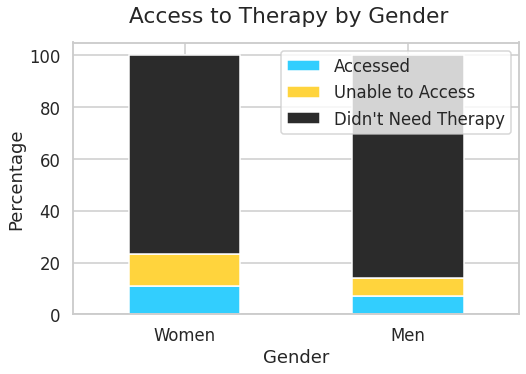

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

gender_df.plot(kind="bar", stacked=True, ax=ax,
               color=[flatiron_blue, workzone_yellow, slate_gray])

ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")
ax.set_xticklabels(gender_df.index, rotation=0)
fig.suptitle("Access to Therapy by Gender");

#### What if we again leave out "didn't need therapy"?

In [ ]:
# drop "didn't need therapy" column
gender_df.drop("Didn't Need Therapy", axis=1, inplace=True)

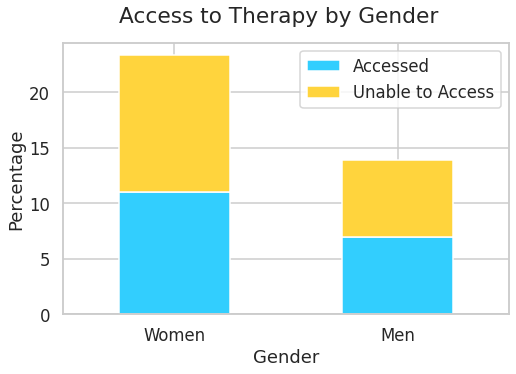

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

gender_df.plot(kind="bar", stacked=True, ax=ax, color=[flatiron_blue, workzone_yellow])

ax.set_xlabel("Gender")
ax.set_ylabel("Percentage")
ax.set_xticklabels(gender_df.index, rotation=0)
fig.suptitle("Access to Therapy by Gender");

## Breakdown by Age

In [ ]:
df[df["group"] == "By Age"]["subgroup"].value_counts().sort_index()

18 - 29 years         8
30 - 39 years         8
40 - 49 years         8
50 - 59 years         8
60 - 69 years         8
70 - 79 years         8
80 years and above    8
Name: subgroup, dtype: int64

In [ ]:
df[df["group"] == "By Age"]["subgroup"].unique()

array(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above'],
      dtype=object)

This is...a lot of categories.  Let's use a loop to make this table of results, rather than calculating each one individually

In [ ]:
age_groups = df[df["group"] == "By Age"]["subgroup"].unique()

list_of_records = []

for age_group in age_groups:
    age_group_got_therapy = float(df[
        (df["indicator"] == "Received Counseling or Therapy, Last 4 Weeks") &
        (df["subgroup"] == age_group) &
        (df["time_period"] == "14")
    ]["value"].item())
    
    age_group_needed_therapy = float(df[
        (df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") &
        (df["subgroup"] == age_group) &
        (df["time_period"] == "14")
    ]["value"].item())
    
    age_group_didnt_need_therapy = 100 - age_group_got_therapy - age_group_needed_therapy
    
    list_of_records.append({
        "Accessed": age_group_got_therapy,
        "Unable to Access": age_group_needed_therapy,
        "Didn't Need Therapy": age_group_didnt_need_therapy
    })


age_group_df = pd.DataFrame(list_of_records, index=age_groups)

age_group_df.style.set_table_styles(df_style).format(df_format)

,Accessed,Unable to Access,Didn't Need Therapy
18 - 29 years,13.0%,15.9%,71.1%
30 - 39 years,12.4%,13.8%,73.8%
40 - 49 years,10.5%,11.2%,78.3%
50 - 59 years,8.1%,7.6%,84.3%
60 - 69 years,5.9%,5.3%,88.8%
70 - 79 years,3.7%,3.3%,93.0%
80 years and above,3.5%,3.5%,93.0%


## Visualize It!

Similar to the gender example, we have 3 dimensions:

1. Therapy access
2. Percentage
3. Age group

Unlike the previous example, the third dimension has a "direction" to it.  As you increase along the _age_ axis, you see a change in access to therapy that trends in the same direction

For that reason, let's make it a **stacked area chart** which removes the spaces between the bars and creates the appearance of a smoother line between categories

In [ ]:
age_group_df.index

Index(['18 - 29 years', '30 - 39 years', '40 - 49 years', '50 - 59 years',
       '60 - 69 years', '70 - 79 years', '80 years and above'],
      dtype='object')

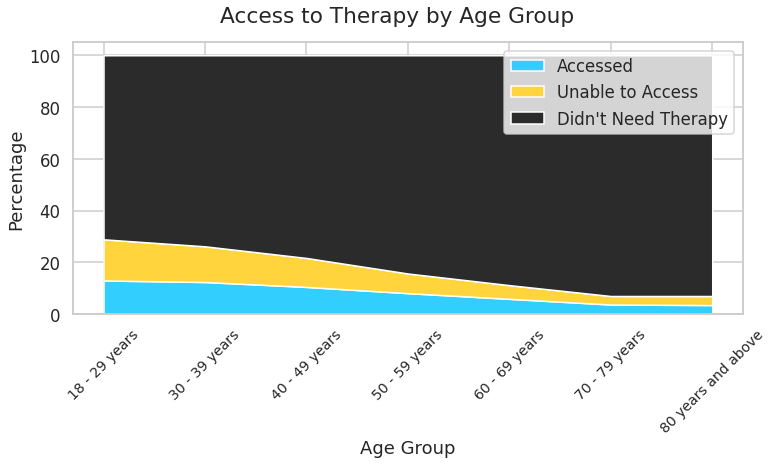

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.stackplot(age_group_df.index, age_group_df.T,
             colors=[flatiron_blue, workzone_yellow, slate_gray],
             labels=age_group_df.index)

ax.set_xlabel("Age Group")
ax.set_ylabel("Percentage")
ax.set_xticklabels(age_group_df.index, rotation=45, fontdict={'fontsize': 14})
ax.legend(labels=age_group_df.columns, loc="upper right")
fig.suptitle("Access to Therapy by Age Group");

#### Once again, without "didn't need therapy"

In [ ]:
# drop "didn't need therapy" column
age_group_df.drop("Didn't Need Therapy", axis=1, inplace=True)

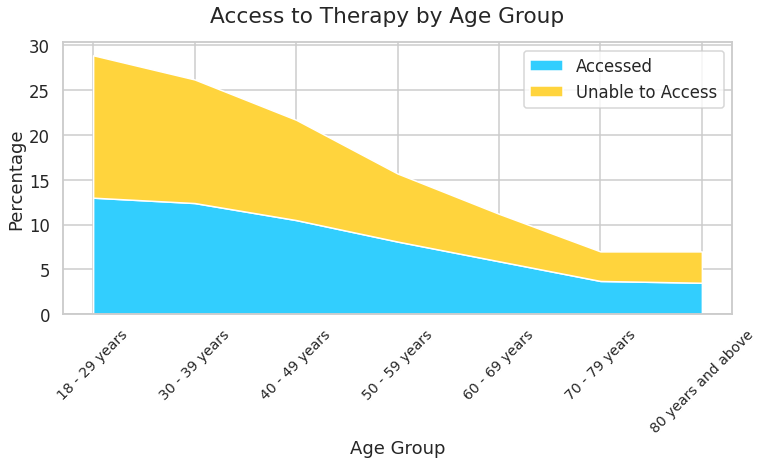

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))

ax.stackplot(age_group_df.index, age_group_df.T,
             colors=[flatiron_blue, workzone_yellow],
             labels=age_group_df.index)

ax.set_xlabel("Age Group")
ax.set_ylabel("Percentage")
ax.set_xticklabels(age_group_df.index, rotation=45, fontdict={'fontsize': 14})
ax.legend(labels=age_group_df.columns, loc="upper right")
fig.suptitle("Access to Therapy by Age Group");

## Breakdown by Geography

In [ ]:
df[df["group"] == "By State"]["subgroup"].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

Even more categories!  We definitely want to use a loop again

In [ ]:
states = df[df["group"] == "By State"]["subgroup"].unique()

list_of_records = []

for state in states:
    state_got_therapy = float(df[
        (df["indicator"] == "Received Counseling or Therapy, Last 4 Weeks") &
        (df["subgroup"] == state) &
        (df["time_period"] == "14")
    ]["value"].item())
    
    state_needed_therapy = float(df[
        (df["indicator"] == "Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks") &
        (df["subgroup"] == state) &
        (df["time_period"] == "14")
    ]["value"].item())
    
    state_didnt_need_therapy = 100 - state_got_therapy - state_needed_therapy
    
    list_of_records.append({
        "Accessed": state_got_therapy,
        "Unable to Access": state_needed_therapy,
        "Didn't Need Therapy": state_didnt_need_therapy
    })


state_df = pd.DataFrame(list_of_records, index=states)

state_df.style.set_table_styles(df_style).format(df_format)

,Accessed,Unable to Access,Didn't Need Therapy
Alabama,6.9%,9.9%,83.2%
Alaska,8.2%,9.6%,82.2%
Arizona,10.1%,12.3%,77.6%
Arkansas,6.4%,12.1%,81.5%
California,8.9%,9.2%,81.9%
Colorado,9.5%,12.9%,77.6%
Connecticut,12.0%,8.3%,79.7%
Delaware,9.3%,9.9%,80.8%
District of Columbia,17.0%,12.6%,70.4%
Florida,7.7%,8.6%,83.7%


## Visualize It!

...wow, that's a lot of data points!

Definitely too many rows to go across the x-axis.  And it doesn't really make sense to do a stacked area chart this time, since it doesn't make much sense to be looking for a trend line alphabetically across states...

Let's try a **stacked horizontal bar chart**, with the data ordered from highest to lowest access

In [ ]:
# plot goes from the bottom to the top by default
state_df = state_df.sort_values(by="Accessed")

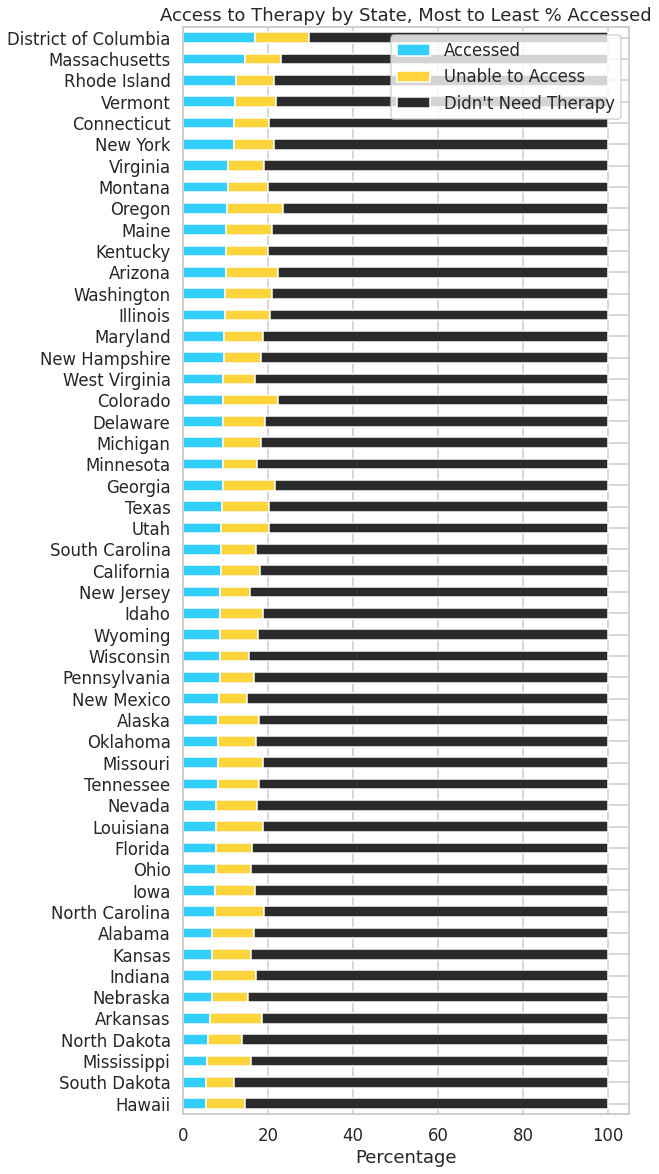

In [ ]:
fig, ax = plt.subplots(figsize=(8, 20))

state_df.plot(kind="barh", stacked=True, ax=ax,
               color=[flatiron_blue, workzone_yellow, slate_gray],
               title="Access to Therapy by State, Most to Least % Accessed")

ax.set_xlabel("Percentage");

#### We can also view by least access

In [ ]:
state_df.columns

Index(['Accessed', 'Unable to Access', 'Didn't Need Therapy'], dtype='object')

In [ ]:
state_df = state_df.sort_values(by="Unable to Access")
state_df = state_df[['Unable to Access', 'Accessed', "Didn't Need Therapy"]]

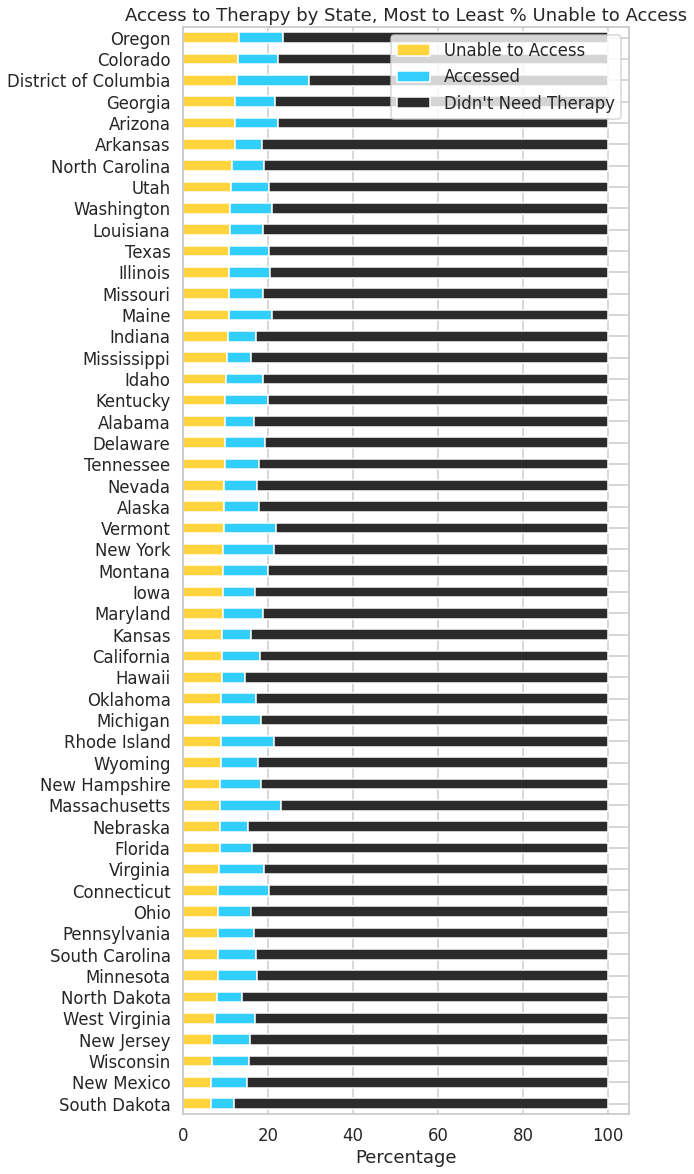

In [ ]:
fig, ax = plt.subplots(figsize=(8, 20))

state_df.plot(kind="barh", stacked=True, ax=ax,
               color=[workzone_yellow, flatiron_blue, slate_gray],
               title="Access to Therapy by State, Most to Least % Unable to Access")

ax.set_xlabel("Percentage");

## Now, for the Grand Finale...Maps!

The above plots are interesting if you want to know how a state compares to its "nearest neighbors" in terms of the numbers.  But what about the actual nearest neighboring states?

In [ ]:
# move the state name from being the index to being a column
state_df.reset_index(inplace=True)
state_df.columns = ["NAME", "Unable to Access", "Accessed", "Didn't Need Therapy"]

In [ ]:
state_df.head()

,NAME,Unable to Access,Accessed,Didn't Need Therapy
0,South Dakota,6.5,5.4,88.1
1,New Mexico,6.5,8.5,85.0
2,Wisconsin,6.9,8.6,84.5
3,New Jersey,6.9,8.8,84.3
4,West Virginia,7.5,9.5,83.0


In [ ]:
# load in the state shape file data
# normally I would use Census shapefiles but the site is down, so let's 
# use one from the NWS instead https://www.weather.gov/gis/USStates
gdf = geopandas.read_file("https://www.weather.gov/source/gis/Shapefiles/County/s_11au16.zip")

In [ ]:
gdf.head()

,STATE,NAME,FIPS,LON,LAT,geometry
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054..."
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ..."
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499..."
3,AS,American Samoa,60,-170.37215,-14.26486,"MULTIPOLYGON (((-170.77310 -14.36245, -170.773..."
4,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0..."


In [ ]:
# merge the state shape files with the mental health data
merged_df = gdf.merge(state_df, on="NAME")

In [ ]:
# check the length of the new dataframe
len(merged_df)

52

In [ ]:
merged_df.head()

,STATE,NAME,FIPS,LON,LAT,geometry,Unable to Access,Accessed,Didn't Need Therapy
0,AK,Alaska,02,-152.24098,64.24019,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",9.6,8.2,82.2
1,AL,Alabama,01,-86.82676,32.79354,"MULTIPOLYGON (((-88.11011 30.25891, -88.10638 ...",9.9,6.9,83.2
2,AR,Arkansas,05,-92.43920,34.89977,"POLYGON ((-91.62986 36.49921, -91.62849 36.499...",12.1,6.4,81.5
3,AZ,Arizona,04,-111.66457,34.29323,"POLYGON ((-110.49090 37.00361, -110.48750 37.0...",12.3,10.1,77.6
4,CA,California,06,-119.60818,37.24537,"MULTIPOLYGON (((-118.42620 32.79973, -118.4263...",9.2,8.9,81.9


### Plotting code!

Here we are making side-by-side plots to compare the percentage who have accessed therapy to the percentage who were unable to access therapy

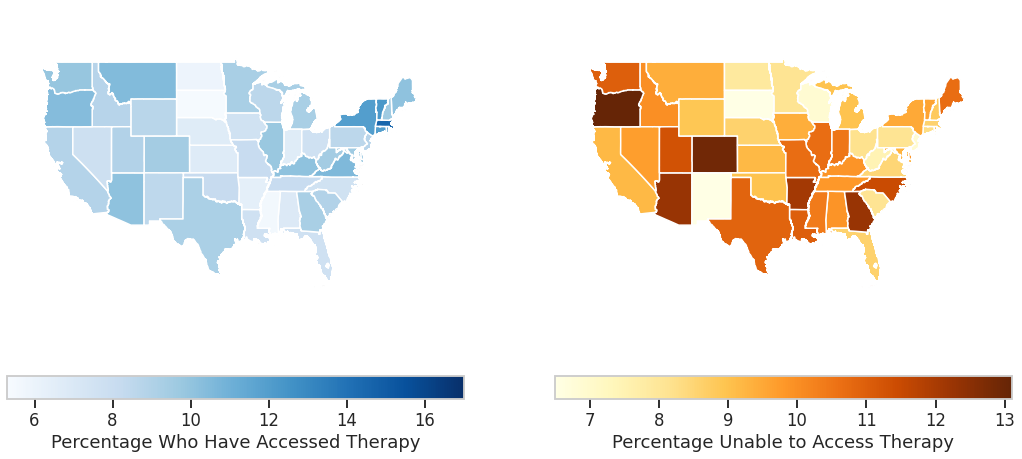

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18, 8))

merged_df.plot(column="Accessed", ax=ax1, cmap="Blues",
               legend=True, legend_kwds={
                   "label": "Percentage Who Have Accessed Therapy",
                   "orientation": "horizontal"
               }
              )
ax1.set_xlim(left=-130, right=-60)
ax1.set_ylim(bottom=22, top=55)
ax1.axis('off')
ax1.patch.set_visible(False)

merged_df.plot(column="Unable to Access", ax=ax2, cmap="YlOrBr",
               legend=True, legend_kwds={
                   "label": "Percentage Unable to Access Therapy",
                   "orientation": "horizontal"
               }
              )

ax2.set_xlim(left=-130, right=-60)
ax2.set_ylim(bottom=22, top=55)
ax2.axis('off')
ax2.patch.set_visible(False)

fig.patch.set_visible(False);

## Questions?